In [ ]:
라이브러리

In [2]:
import numpy as np
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray

from scipy import signal, ndimage
import matplotlib.pylab as pylab

In [ ]:
영상 표시 함수

In [4]:
def plot_image(image, title):
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')

In [ ]:
침식(erosion)

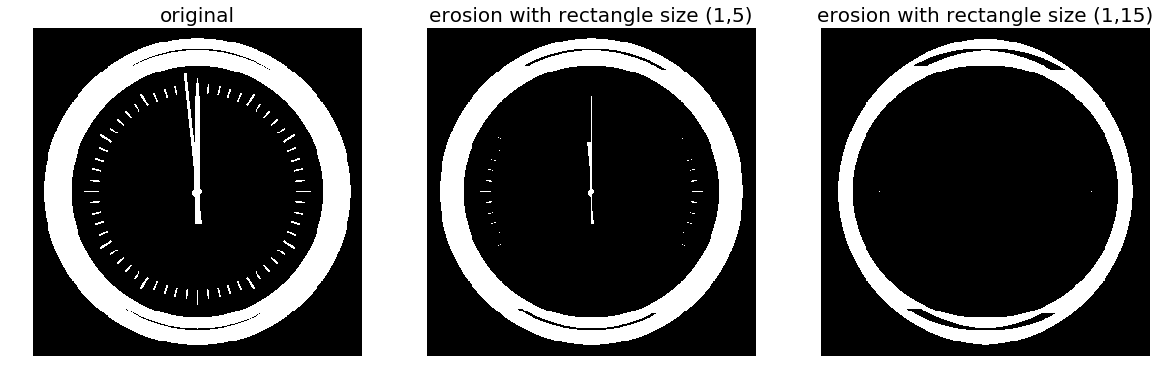

In [5]:
from skimage.morphology import binary_erosion, rectangle

im = rgb2gray(imread('../images/clock2.jpg'))
im[im <= 0.5] = 0 # 고정 임계값 0.5를 기준으로 이진 영상 생성
im[im > 0.5] = 1
im1 = binary_erosion(im, rectangle(1,5))
im2 = binary_erosion(im, rectangle(1,15))

pylab.figure(figsize=(20,10)) , pylab.gray()
pylab.subplot(1,3,1), plot_image(im, 'original')
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')
pylab.subplot(1,3,3), plot_image(im2, 'erosion with rectangle size (1,15)')
pylab.show()

In [ ]:
팽창(dilation)

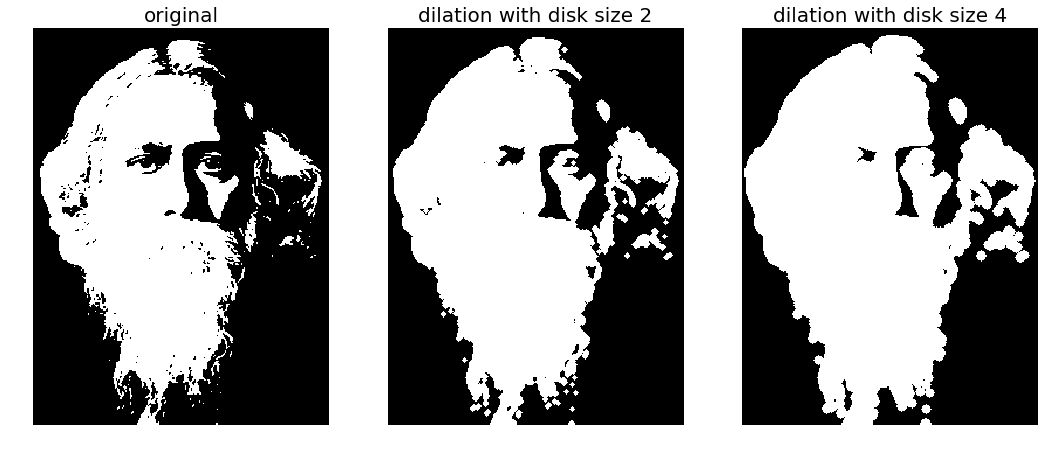

In [6]:
from skimage.morphology import binary_dilation, disk

im = img_as_float(imread('../images/tagore.png')) # for this binary png
im = 1 - im[...,3] # 3개 채널만 사용, 알파 채널 포함된 입력 영상
im[im <= 0.5] = 0
im[im > 0.5] = 1

pylab.figure(figsize=(18,9)), pylab.gray()
pylab.subplot(131), plot_image(im, 'original')
for d in range(1, 3):
    im1 = binary_dilation(im, disk(2*d))
    pylab.subplot(1,3, d+1), plot_image(im1, 'dilation with disk size ' + str(2*d))
pylab.show()

In [ ]:
열림과 닫힘(opening and closing)

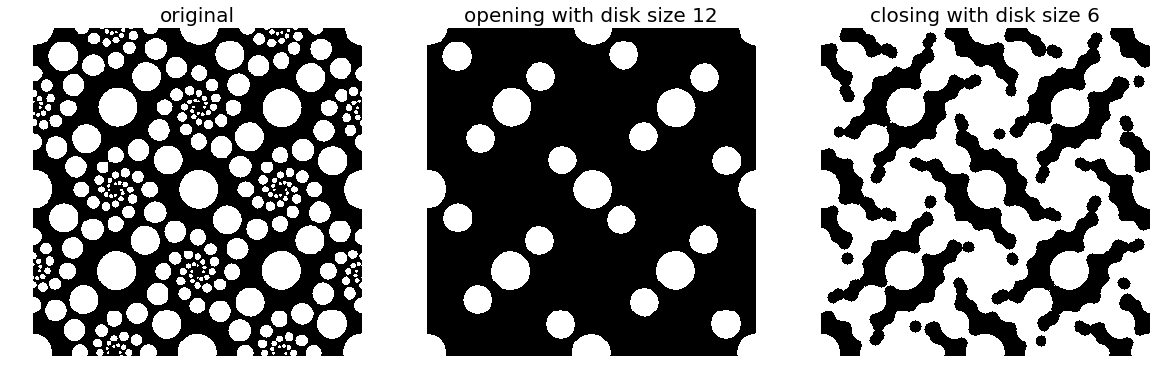

In [9]:
from skimage.morphology import binary_opening, binary_closing, disk

im = rgb2gray(imread('../images/circles.jpg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
im1 = binary_opening(im, disk(12))
im2 = binary_closing(im, disk(6))

pylab.figure(figsize=(20,10)), pylab.gray()
pylab.subplot(1,3,1), plot_image(im, 'original')
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
pylab.subplot(1,3,3), plot_image(im2, 'closing with disk size ' + str(6))
pylab.show()

In [ ]:
골격화(skeletonizing)

<Figure size 432x288 with 0 Axes>

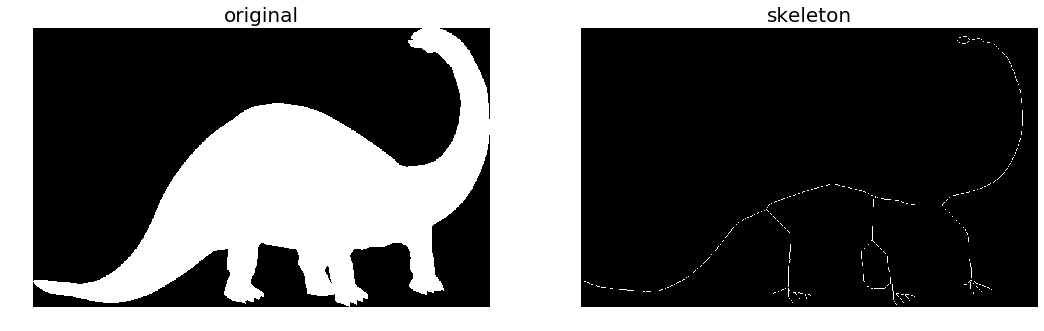

In [12]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()
    
from skimage.morphology import skeletonize

im = img_as_float(imread('../images/dynasaur.png')[...,3])
threshold = 0.5
im[im <= threshold] = 0
im[im > threshold] = 1
skeleton = skeletonize(im)
plot_images_horizontally(im, skeleton, 'skeleton',sz=(18,9))

In [ ]:
볼록 선체(convex hull) 계산하기

<Figure size 432x288 with 0 Axes>

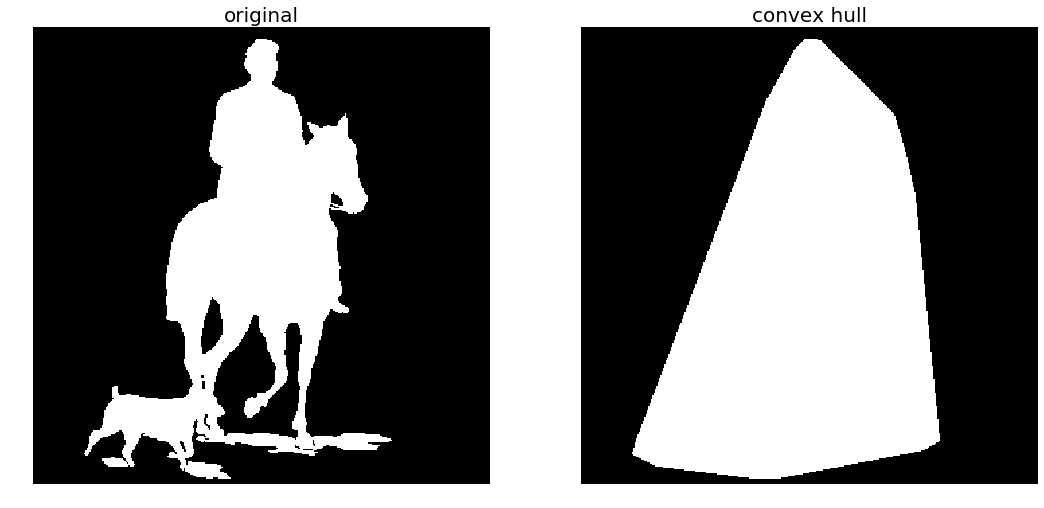

In [15]:
from skimage.morphology import convex_hull_image

im = rgb2gray(imread('../images/horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0 # 이진 영상 변환
im[im >= threshold] = 1
chull = convex_hull_image(im)
plot_images_horizontally(im, chull, 'convex hull', sz=(18,9))

In [ ]:
이진 영상과 계산된 볼록 선체 영상의 차 영상

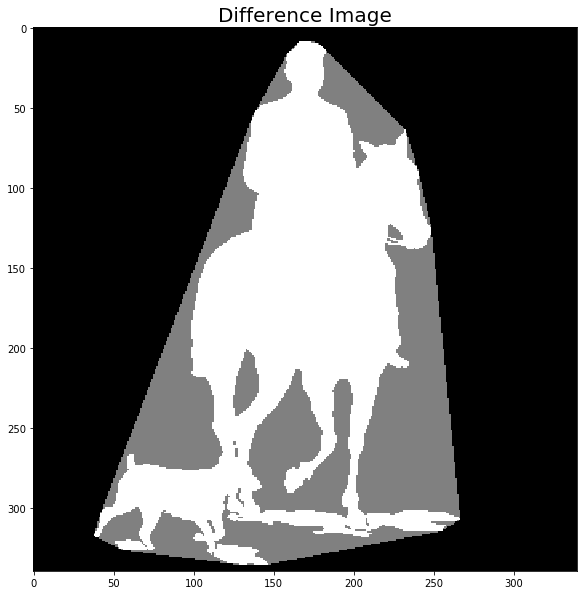

In [16]:
im = im.astype(np.bool)
chull_diff = img_as_float(chull.copy())
chull_diff[im] = 2

pylab.figure(figsize=(20,10))
pylab.imshow(chull_diff, cmap=pylab.cm.gray, interpolation='nearest')
pylab.title('Difference Image', size=20)
pylab.show()

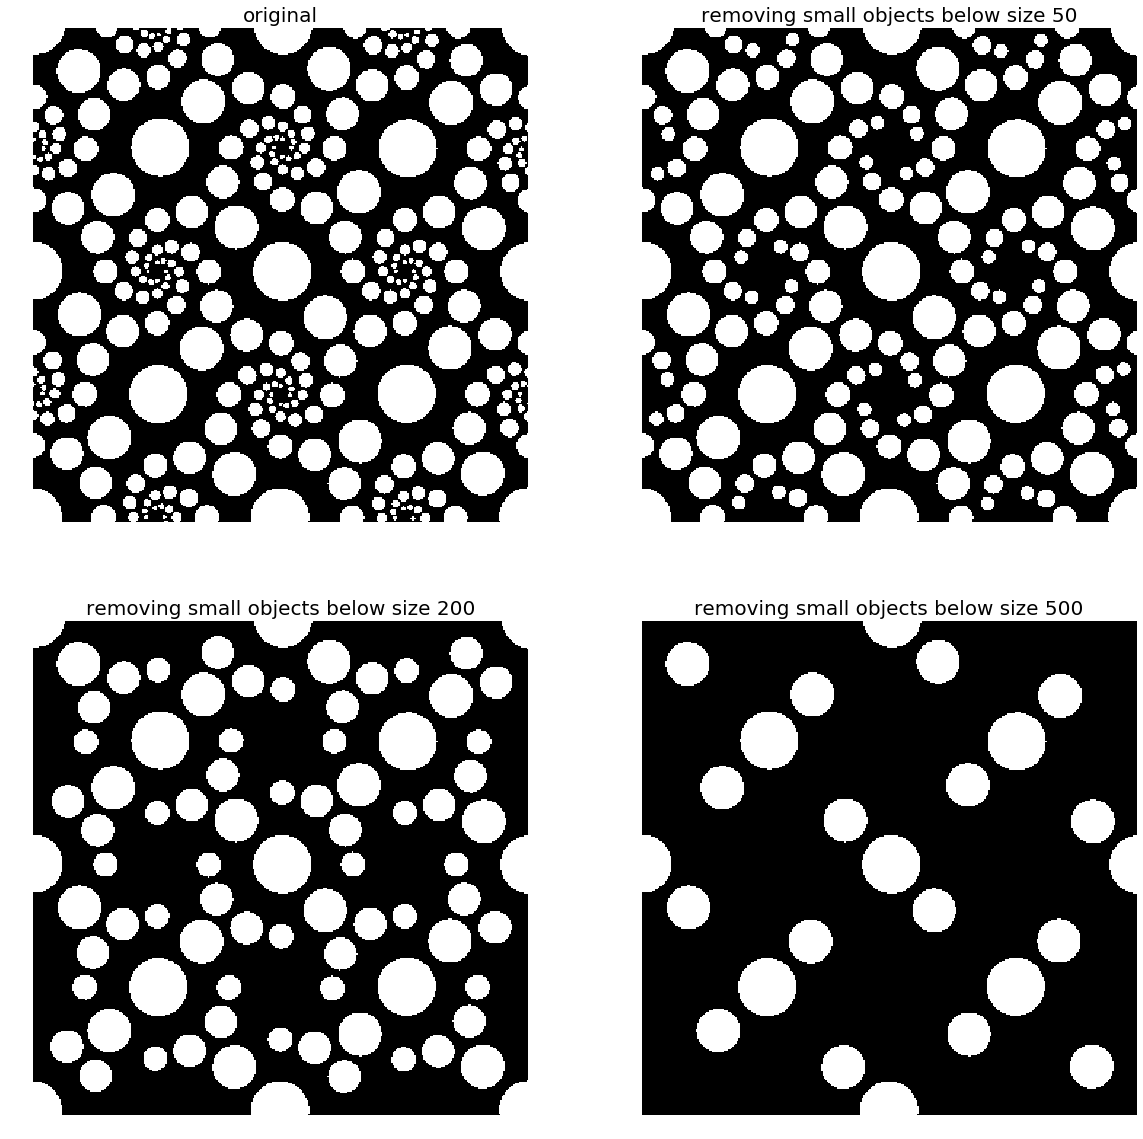

In [17]:
from skimage.morphology import remove_small_objects

im = rgb2gray(imread('../images/circles.jpg'))
im[im <= 0.5], im[im > 0.5] = 0, 1 # 임계값 0.5로 이진화 수행
im = im.astype(np.bool)
pylab.figure(figsize=(20,20))
pylab.subplot(2,2,1), plot_image(im, 'original')

for i, osz in enumerate([50, 200, 500]):
    im1 = remove_small_objects(im, osz, connectivity=1)
    pylab.subplot(2,2,i+2)
    plot_image(im1, 'removing small objects below size ' + str(osz))
pylab.show()

In [ ]:
흰색과 검은색 탑-햇(top-hats)

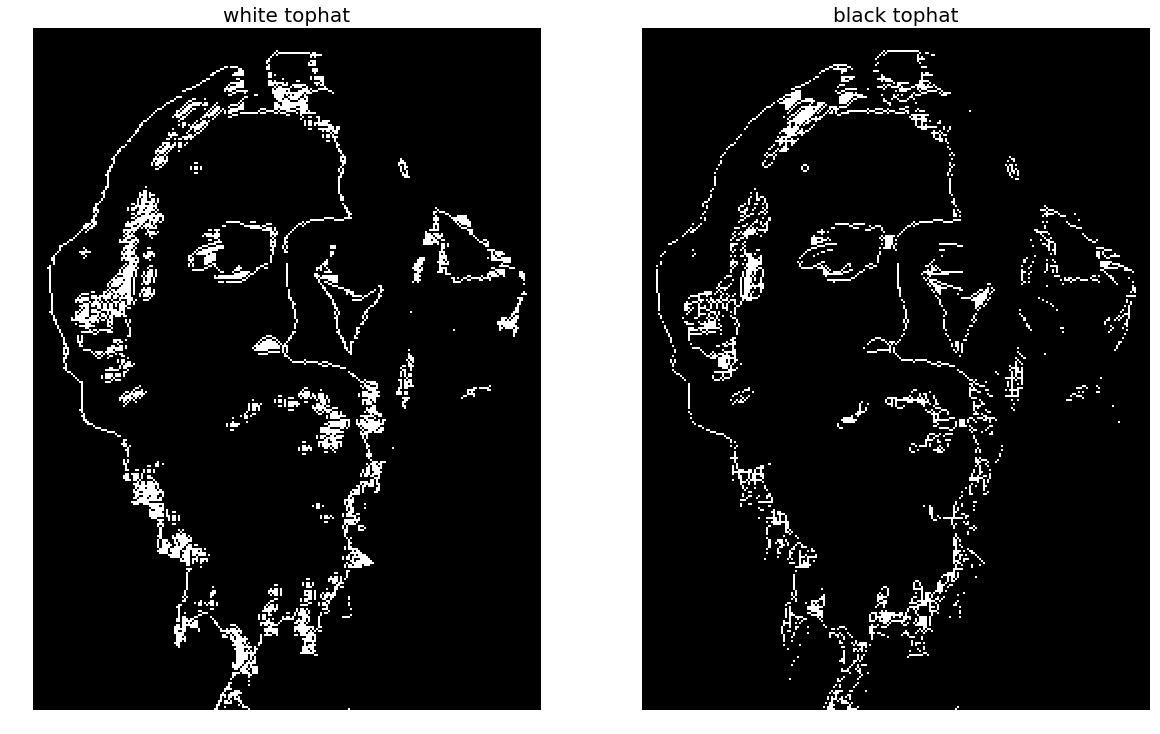

In [18]:
from skimage.morphology import white_tophat, black_tophat, square

im = imread('../images/tagore.png')[...,3]
im[im <= 0.5], im[im > 0.5] = 0, 1 # 이진 영상으로 변환
im1 = white_tophat(im, square(5))
im2 = black_tophat(im, square(5))

pylab.figure(figsize=(20,15)), pylab.gray()
pylab.subplot(1,2,1), plot_image(im1, 'white tophat')
pylab.subplot(1,2,2), plot_image(im2, 'black tophat')
pylab.show()

In [ ]:
경계 추출

<Figure size 432x288 with 0 Axes>

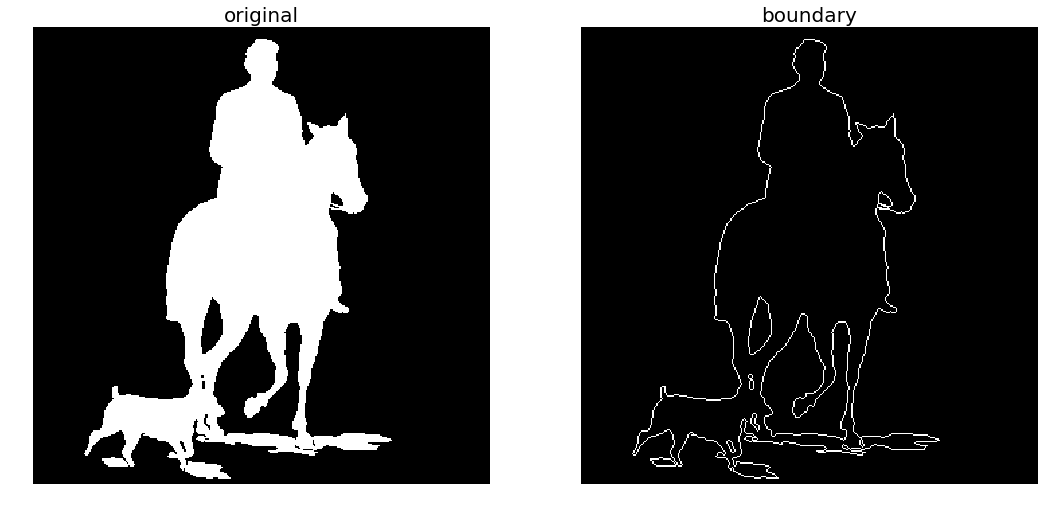

In [19]:
from skimage.morphology import binary_erosion

im = rgb2gray(imread('../images/horse-dog.jpg'))
threshold = 0.5
im[im < threshold], im[im >= threshold] = 0, 1 # 이진화
boundary = im - binary_erosion(im)
plot_images_horizontally(im, boundary, 'boundary',sz=(18,9))
pylab.show()

In [ ]:
열림과 닫힘을 사용한 지문 개선

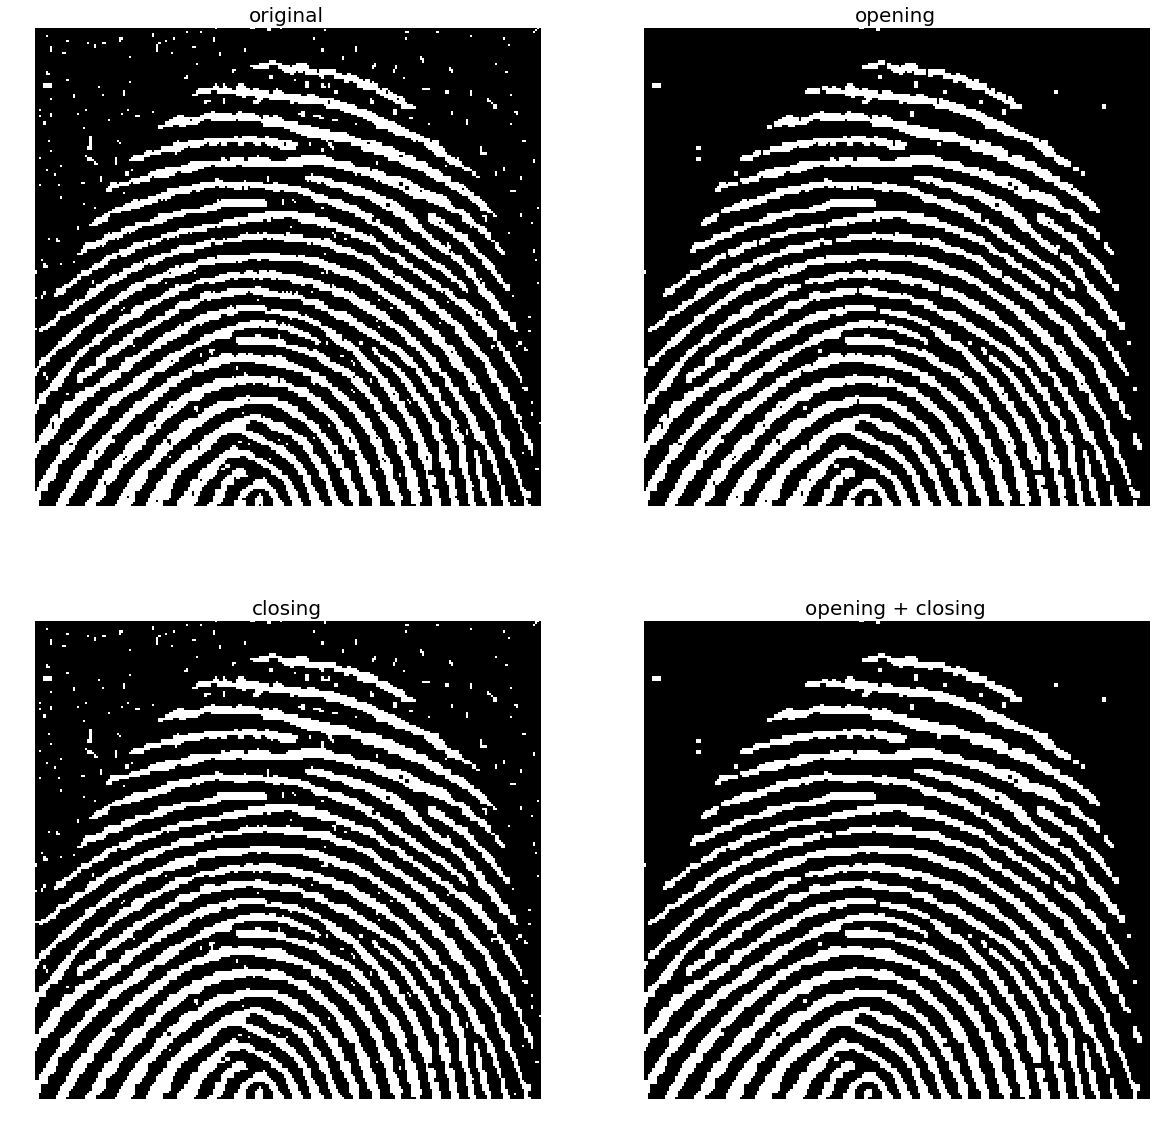

In [20]:
from skimage.morphology import binary_closing, binary_opening

im = rgb2gray(imread('../images/fingerprint.jpg'))
im[im <= 0.5], im[im > 0.5] = 0, 1 # 이진화
im_o = binary_opening(im, square(2))
im_c = binary_closing(im, square(2))
im_oc = binary_closing(binary_opening(im, square(2)), square(2))

pylab.figure(figsize=(20,20))
pylab.subplot(221), plot_image(im, 'original')
pylab.subplot(222), plot_image(im_o, 'opening')
pylab.subplot(223), plot_image(im_c, 'closing')
pylab.subplot(224), plot_image(im_oc, 'opening + closing')
pylab.show()

In [ ]:
명암도 연산

<Figure size 432x288 with 0 Axes>

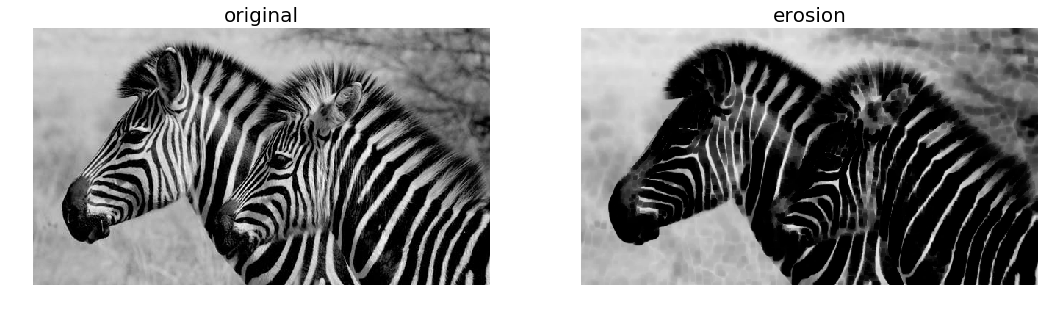

In [32]:
from skimage.morphology import dilation, erosion, closing, opening, square

im = imread('../images/zebras.jpg')
im = rgb2gray(im)
struct_elem = square(5)
eroded = erosion(im, struct_elem)
plot_images_horizontally(im, eroded, 'erosion')

<Figure size 432x288 with 0 Axes>

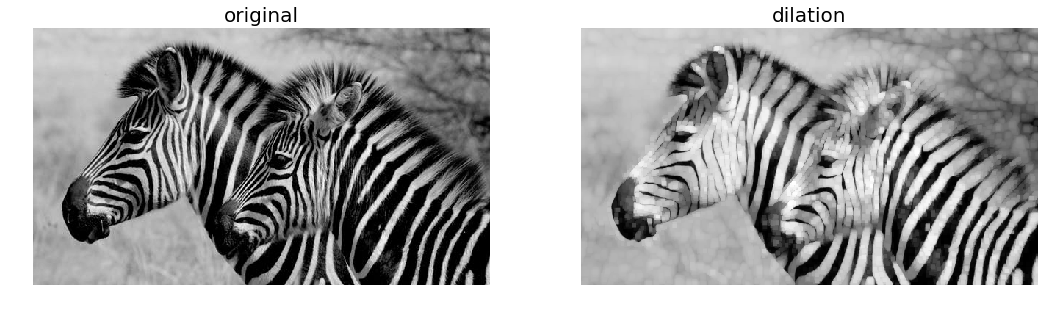

In [31]:
dilated = dilation(im, struct_elem)
plot_images_horizontally(im, dilated, 'dilation')

In [ ]:
명암도 영상에 열림 연산 적용

<Figure size 432x288 with 0 Axes>

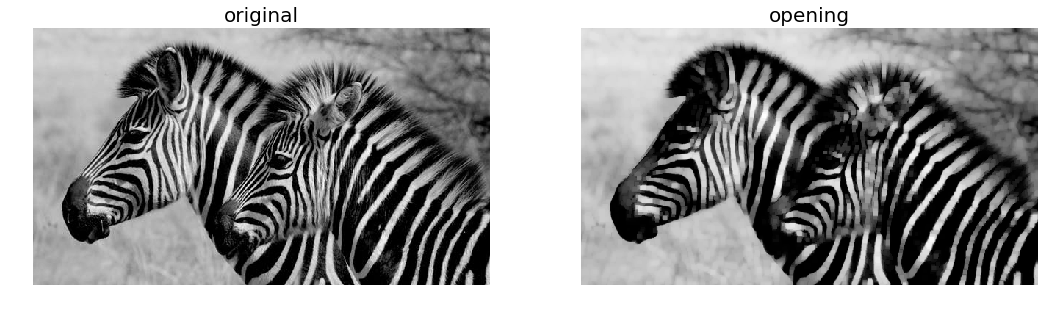

In [30]:
opened = opening(im, struct_elem)
plot_images_horizontally(im, opened, 'opening')

In [ ]:
명암도 영상에 닫힘 연산 적용

<Figure size 432x288 with 0 Axes>

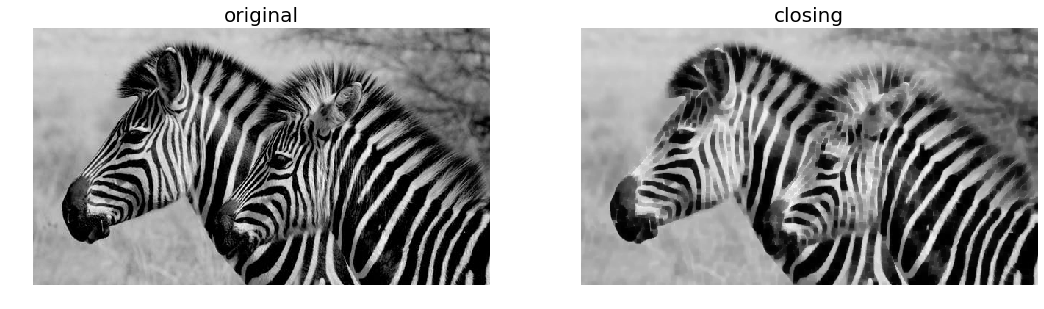

In [33]:
closed = closing(im, struct_elem)
plot_images_horizontally(im, closed, 'closing')